# ИС-2019. ЛР№4. Нормализация данных. Нейронная сеть. (Py. 2.7)

# Цель работы
Разработка проекта сегмента базы знаний интеллектуальной системы, содержащей набор моделей, сформированных с помощью различных методов машинного обучения (модели линейной множественной регрессии, деревья решений, нейронные сети). 

Знакомство с технологией пополнения базы знаний и её использования.

# Задание
1. Выполнить загрузку подготовленного набора данных (отчищенного от пропусков и выбросов для целевой и независимых переменных).

2. Выполнить процедуры нормализации данных и разбиения данных на обучающее и проверочное множества. Полученные наборы сохранить для последующего использования в п.4.

3. Создать, обучить, оценить качество и сохранить в __требуемом формате*__ следующие виды моделей для сегмента базы знаний интеллектуальной системы:
  
  1. Нейронная сеть (классический перцептрон). Количество узлов входного слоя равно количеству независимых переменных. Количество узлов выходного слоя равно количеству целевых переменных.
  
  2. Модель линейной множественной регрессии
 
  3. Дерево регрессии
  
  
4. Создать новую рабочую тетрадь Jupyter Notebook для знакомства с технологией использования сформированного сегмента базы знаний, в которой:
    1. загрузить сформированные в п.2 набор данных, содержащий только проверочное множество;
    2. загрузить сформированные в п.3 модели;
    - выполнить расчет значений целевой переменной (нормированной) из "ТЕСТОВОЙ" выборки
    - выполнить __интерпретацию__ (денормализацию ~ перевод из нормированных в исходные шкалы) значений целевой переменной, которые были получены с использованием различных моделей.
    - Сравнить реальные (ненормализованные) значения целевой переменной с вычисленными (денормализованными), полученными с применениями различных моделей (модели линейной множественной регрессии, деревья решений, нейронные сети)
    - сформулировать выводы по работе
    
#### *Требования к формату представления моделей для сегмента базы знаний.
Обязательные поля:
- название модели;
- метод формирования модели (линейная регрессия, дерево регрессии, нейросеть, нечеткая логика и т.д.);
- значения оценок точности (R2, MAE, MSE);
- способ нормализации данных (0 - без преобразований, 1 - ...)
- наименование целевой переменной;
- наименование независимых (входных) переменных;
- данные для процедуры денормализации(приведения к исходному диапазону);
- примечания и особые пояснения.

# Ход работы

In [11]:
import pandas as pd
import numpy as np

###import pybrain as pb
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.datasets import SupervisedDataSet
from pybrain.structure import SigmoidLayer
from pybrain.structure import LinearLayer
from pybrain.structure import SoftmaxLayer

from sklearn import linear_model
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

import pickle
import json

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

pd.set_option('display.precision', 3);
%matplotlib inline

import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import json

# 2. Подготовка данных

In [12]:
data = pd.read_csv("bike-sharing-dataset-clean.csv", 
                   sep=',')

In [13]:
data.head()

,Unnamed: 0,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.288,0.81,0.0,3,13,16
1,1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.273,0.80,0.0,8,32,40
2,2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.273,0.80,0.0,5,27,32
3,3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.288,0.75,0.0,3,10,13
4,4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.288,0.75,0.0,0,1,1


Целевая переменная:
- 'Cnt' - количество клиентов.

Признаки для анализа: 
  * 'temp' - Температура
  * 'hr'-  Время суток(часы)
  * 'hum' - Влажность

In [14]:
features = [ u'temp', u'hr', u'hum']
target = [u'cnt']

In [15]:
data.shape

(17357, 18)

In [16]:
dataOrigin = data

## 2.0. Проверка признаков на выбросы

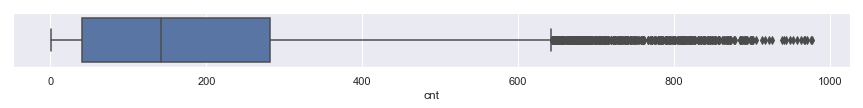

In [17]:
plt.figure(figsize=(15,1))
sns.boxplot(dataOrigin['cnt'])

 len dataOrigin = 17357,
 len data12 = 8734,
 отброшено 8623


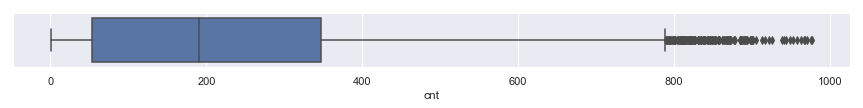

In [18]:
data12 = dataOrigin[ ~ (dataOrigin['yr'] != 1)]
plt.figure(figsize=(15,1))
sns.boxplot( data12['cnt'])
print " len dataOrigin = {},\n len data12 = {},\n отброшено {}".format( len(dataOrigin), len(data12), len(dataOrigin) - len(data12))

 len dataOrigin = 17357,
 len dataClean12 = 8534,
 отброшено 8823


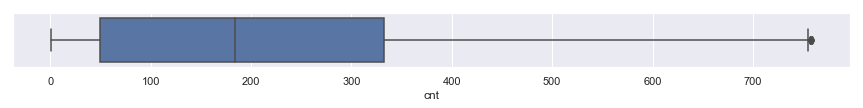

In [19]:
dataCntTresshold = 760
dataClean12 = data12[ (data12['cnt'] < dataCntTresshold) ]
plt.figure(figsize=(15,1))
sns.boxplot( dataClean12['cnt'])
print " len dataOrigin = {},\n len dataClean12 = {},\n отброшено {}".format( len(dataOrigin), len(dataClean12), len(dataOrigin) - len(dataClean12))

In [20]:
dataClean12.head(3)

,Unnamed: 0,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8623,8645,8646,2012-01-01,1,1,1,0,0,0,0,1,0.36,0.379,0.66,0.000,5,43,48
8624,8646,8647,2012-01-01,1,1,1,1,0,0,0,1,0.36,0.348,0.66,0.134,15,78,93
8625,8647,8648,2012-01-01,1,1,1,2,0,0,0,1,0.32,0.348,0.76,0.000,16,59,75


## 2.1. Нормализация данных

 Информация о признаках:

In [21]:
dataClean12.describe(include=np.object)

,dteday
count,8534
unique,366
top,2012-09-18
freq,24


Датасет содержит единственный категориальный признак dteday. 
Кодирование признака с помощью функции OrdinalEncoder()

preprocessing.OrdinalEncoder() - Назначает числовое значение из нумерованный список уникальныз категориальных значений. Причем присваиваемые порядковые номера 0<1<2<3 ... и т.д. чаще не отражает реальную взаимосвязь внутри множества, но будут учитываться моделью машинного обучения.

- создать экземпляр
- передать исходное множество признаков в метод .fit(X)
- передать в метод преобразования множество категориальных значений .transform(X)

In [22]:
enc = preprocessing.OrdinalEncoder()
enc.fit( dataClean12[['dteday']] )
print "Множество уникальных значений\n", enc.categories_[0][:10]
print "Преобразование [['dteday']]     = ", enc.transform([['2012-01-05']])

Множество уникальных значений
['2012-01-01' '2012-01-02' '2012-01-03' '2012-01-04' '2012-01-05'
 '2012-01-06' '2012-01-07' '2012-01-08' '2012-01-09' '2012-01-10']
Преобразование [['dteday']]     =  [[4.]]


In [23]:
dataClean12.head(3)

,Unnamed: 0,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8623,8645,8646,2012-01-01,1,1,1,0,0,0,0,1,0.36,0.379,0.66,0.000,5,43,48
8624,8646,8647,2012-01-01,1,1,1,1,0,0,0,1,0.36,0.348,0.66,0.134,15,78,93
8625,8647,8648,2012-01-01,1,1,1,2,0,0,0,1,0.32,0.348,0.76,0.000,16,59,75


In [24]:
# сформировать массив с именами признаков
new_column_name = 'dteday_v'
# создать объект DataFrame с колонками - бинарными признаками
new_col =  enc.transform( dataClean12[['dteday']] )
new_col

array([[  0.],
       [  0.],
       [  0.],
       ...,
       [365.],
       [365.],
       [365.]])

In [25]:
len(enc.transform(dataClean12[['dteday']]))

8534

In [26]:
dataClean12.shape

(8534, 18)

In [27]:
# объединить существующую таблицу и новые колонки
dataClean12['dteday_v'] = new_col

C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
dataClean12

,Unnamed: 0,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_v
8623,8645,8646,2012-01-01,1,1,1,0,0,0,0,1,0.36,0.379,0.66,0.000,5,43,48,0.0
8624,8646,8647,2012-01-01,1,1,1,1,0,0,0,1,0.36,0.348,0.66,0.134,15,78,93,0.0
8625,8647,8648,2012-01-01,1,1,1,2,0,0,0,1,0.32,0.348,0.76,0.000,16,59,75,0.0


### 2.1.3. Нормализация количественных признаков

Для дальнейшей работы с проведем процедуры шкалирования значений так, чтобы приведенные значения располагались в диапазоне от 0.0 до 1.0. Вначале разделим имена столбцов по типу хранимых данных на числовые и категориальные. Сформируем таблицу "dataNumeric" из столбцов только с числовыми значениями.

In [29]:
# Разделение столбцов с числовыми и категориальными значениями 
digital_colums = list()
cat_colums     = list()

# для каждого названия столбца
for col_name in dataClean12.columns:
    
    # если тип данных столбца не равен числовому
    if (dataClean12[col_name].dtype != 'object'):
        # добавить в список числовых
        digital_colums.append(col_name)
        
    else:
        # иначе добавить в список категориальных
        cat_colums.append(col_name)
        
print digital_colums
print cat_colums

['Unnamed: 0', 'instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'dteday_v']
['dteday']


In [30]:
dataNumeric = dataClean12[digital_colums] # таблица только числовых признаков
dataNumeric.shape

(8534, 18)

Для удобства и наглядности преобразований создадим структуру данных "словарь" содержащую отдельные шкалы для каждого признака. Словарь - неупорядоченная коллекция произвольных объектов с доступом по ключу. 

       dictName['KeyName'] = Value
В качестве шкалы выберем объект __preprocessing.MinMaxScaler(feature_range=(0, 1))__, где feature_range=(0, 1) - целевой диапазон значений.

In [31]:
dictScaler = dict(); # словарь стандартизирующих шкал
dictScaledValue = dict(); # словарь стандартизированных значений

for col_name in digital_colums:
    print ""
    print col_name
    
    # создать шкалу  MinMaxScaler(feature_range=(0, 1))
    dictScaler[col_name] = MinMaxScaler(feature_range=(0, 1))
    
    # для очередного имени признака провести настройку шкалы на основе значений исходной таблицы 
    column_scaler = dictScaler[col_name]
    column_scaler.fit( dataNumeric [[col_name]] )

    print  "data_min_    = ",  (column_scaler.data_min_ )
    print  "data_max_    = ",  (column_scaler.data_max_ )
    print  "min_ = ",          (column_scaler.min_)   # min - X.min(axis=0) * self.scale_ 
    print  "scale_ = ",        (column_scaler.scale_) # (max - min) / (X.max(axis=0) - X.min(axis=0))
    print  "data_range_  = ",  (column_scaler.data_range_ )
    
    # для очередного имени признака добавить в словарь приведенные значения к диапазону [0.0, 1.0]
    dictScaledValue[col_name] = column_scaler.transform( dataNumeric[[col_name]] )
    
    # заменить значения на приведенные в таблице dataNumeric
    dataNumeric.loc[:, col_name] = dictScaledValue[col_name]



Unnamed: 0
data_min_    =  [8645.]
data_max_    =  [17378.]
min_ =  [-0.98992328]
scale_ =  [0.00011451]
data_range_  =  [8733.]

instant
data_min_    =  [8646.]
data_max_    =  [17379.]
min_ =  [-0.99003779]
scale_ =  [0.00011451]
data_range_  =  [8733.]

season
data_min_    =  [1.]
data_max_    =  [4.]
min_ =  [-0.33333333]
scale_ =  [0.33333333]
data_range_  =  [3.]

yr
data_min_    =  [1.]
data_max_    =  [1.]
min_ =  [-1.]
scale_ =  [1.]
data_range_  =  [0.]


C:\Users\User\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda2\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



mnth
data_min_    =  [1.]
data_max_    =  [12.]
min_ =  [-0.09090909]
scale_ =  [0.09090909]
data_range_  =  [11.]

hr
data_min_    =  [0.]
data_max_    =  [23.]
min_ =  [0.]
scale_ =  [0.04347826]
data_range_  =  [23.]

holiday
data_min_    =  [0.]
data_max_    =  [1.]
min_ =  [0.]
scale_ =  [1.]
data_range_  =  [1.]

weekday
data_min_    =  [0.]
data_max_    =  [6.]
min_ =  [0.]
scale_ =  [0.16666667]
data_range_  =  [6.]

workingday
data_min_    =  [0.]
data_max_    =  [1.]
min_ =  [0.]
scale_ =  [1.]
data_range_  =  [1.]

weathersit
data_min_    =  [1.]
data_max_    =  [4.]
min_ =  [-0.33333333]
scale_ =  [0.33333333]
data_range_  =  [3.]

temp
data_min_    =  [0.02]
data_max_    =  [1.]
min_ =  [-0.02040816]
scale_ =  [1.02040816]
data_range_  =  [0.98]

atemp
data_min_    =  [0.0152]
data_max_    =  [0.9242]
min_ =  [-0.01672167]
scale_ =  [1.10011001]
data_range_  =  [0.909]

hum
data_min_    =  [0.16]
data_max_    =  [1.]
min_ =  [-0.19047619]
scale_ =  [1.19047619]
data_range

C:\Users\User\Anaconda2\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


С помощью созданных словарей возможно проводить операции
- __dictScaler[' _ИМЯ ПРИЗНАКА_ '].transform(  [[7]]  )__ - прямого преобразования из истинного значения к приведенному
- __dictScaler[' _ИМЯ ПРИЗНАКА_ '].inverse_transform(  [[0.5]]  )__ - обратного преобразования из приведенного значения в истинное

Методы __transform__ и __inverse_transform__ в качестве параметра принимают тип двумерный массив, поэтому одиночное значение следует заключать в двойные квадратные скобки.

In [32]:
print "7    , "  , type( 7 )
print "[[7]], "  , type( [[7]] )

7    ,  <type 'int'>
[[7]],  <type 'list'>


In [33]:
# Пример работы с словарем шкал
print 'hr  = {:>12.6f} истинное  ~  {} шкалированное '.format (12, dictScaler['hr'].transform(  [[12]]  ))  

hr  =    12.000000 истинное  ~  [[0.52173913]] шкалированное 


- - - - - 
Сравним описание cтандартизованных и исходных данных

In [34]:
print "# Просмотр исходной таблицы числовых значений"
dataClean12[digital_colums][:2]

# Просмотр исходной таблицы числовых значений


,Unnamed: 0,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_v
8623,8645,8646,1,1,1,0,0,0,0,1,0.36,0.379,0.66,0.000,5,43,48,0.0
8624,8646,8647,1,1,1,1,0,0,0,1,0.36,0.348,0.66,0.134,15,78,93,0.0


In [35]:
print "# Просмотр стандартизированных числовых значений"
dataNumeric[:2]

# Просмотр стандартизированных числовых значений


,Unnamed: 0,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_v
8623,0.000e+00,0.000e+00,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.347,0.400,0.595,0.000,0.014,0.058,0.062,0.0
8624,1.145e-04,1.145e-04,0.0,0.0,0.0,0.043,0.0,0.0,0.0,0.0,0.347,0.367,0.595,0.167,0.041,0.106,0.121,0.0


In [36]:
dataClean12.describe()

,Unnamed: 0,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_v
count,8534.000,8534.000,8534.000,8534.0,8534.000,8534.000,8534.000,8534.000,8534.000,8534.000,8534.000,8534.000,8534.000,8534.000,8534.000,8534.000,8534.000,8534.000
mean,12990.094,12991.094,2.477,1.0,6.474,11.406,0.031,2.996,0.675,1.418,0.501,0.479,0.614,0.189,41.429,179.150,220.579,181.205
std,2537.659,2537.659,1.112,0.0,3.472,6.946,0.172,2.019,0.469,0.627,0.186,0.166,0.188,0.122,56.672,155.666,189.583,106.211
min,8645.000,8646.000,1.000,1.0,1.000,0.000,0.000,0.000,0.000,1.000,0.020,0.015,0.160,0.000,0.000,0.000,1.000,0.000
25%,10786.250,10787.250,1.000,1.0,3.000,5.000,0.000,1.000,0.000,1.000,0.340,0.333,0.460,0.104,5.000,43.000,50.000,89.000
50%,12964.500,12965.500,2.000,1.0,6.000,11.000,0.000,3.000,1.000,1.000,0.500,0.485,0.610,0.164,19.000,152.000,184.000,180.000
75%,15203.750,15204.750,3.000,1.0,9.000,17.000,0.000,5.000,1.000,2.000,0.640,0.621,0.770,0.254,57.000,264.000,332.000,273.000
max,17378.000,17379.000,4.000,1.0,12.000,23.000,1.000,6.000,1.000,4.000,1.000,0.924,1.000,0.806,367.000,737.000,759.000,365.000


In [37]:
dataNumeric.describe()

,Unnamed: 0,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_v
count,8534.000,8534.000,8534.000,8534.0,8534.000,8534.000,8534.000,8534.000,8534.000,8534.000,8534.000,8534.000,8534.000,8534.000,8534.000,8534.000,8534.000,8534.000
mean,0.498,0.498,0.492,0.0,0.498,0.496,0.031,0.499,0.675,0.139,0.490,0.510,0.540,0.234,0.113,0.243,0.290,0.496
std,0.291,0.291,0.371,0.0,0.316,0.302,0.172,0.336,0.469,0.209,0.190,0.183,0.224,0.151,0.154,0.211,0.250,0.291
min,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.245,0.245,0.000,0.0,0.182,0.217,0.000,0.167,0.000,0.000,0.327,0.350,0.357,0.130,0.014,0.058,0.065,0.244
50%,0.495,0.495,0.333,0.0,0.455,0.478,0.000,0.500,1.000,0.000,0.490,0.517,0.536,0.204,0.052,0.206,0.241,0.493
75%,0.751,0.751,0.667,0.0,0.727,0.739,0.000,0.833,1.000,0.333,0.633,0.667,0.726,0.315,0.155,0.358,0.437,0.748
max,1.000,1.000,1.000,0.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


## 2.2. Разбиение на обучающую и тестовую выборку

In [38]:
corrUnnorm  = dataClean12[digital_colums].corr() 
corrNorm    = dataNumeric[digital_colums].corr() 
print "Максимальное значение разности коэфф. корреляции = ", (corrUnnorm - corrNorm).max().max()


Максимальное значение разности коэфф. корреляции =  3.527733660746435e-14


Примем пороговое значение для коэфф. корреляции corrThresshold = 0.25. Используем его для улучшения читаемости матрицы корелляции, путем фильтрации. 

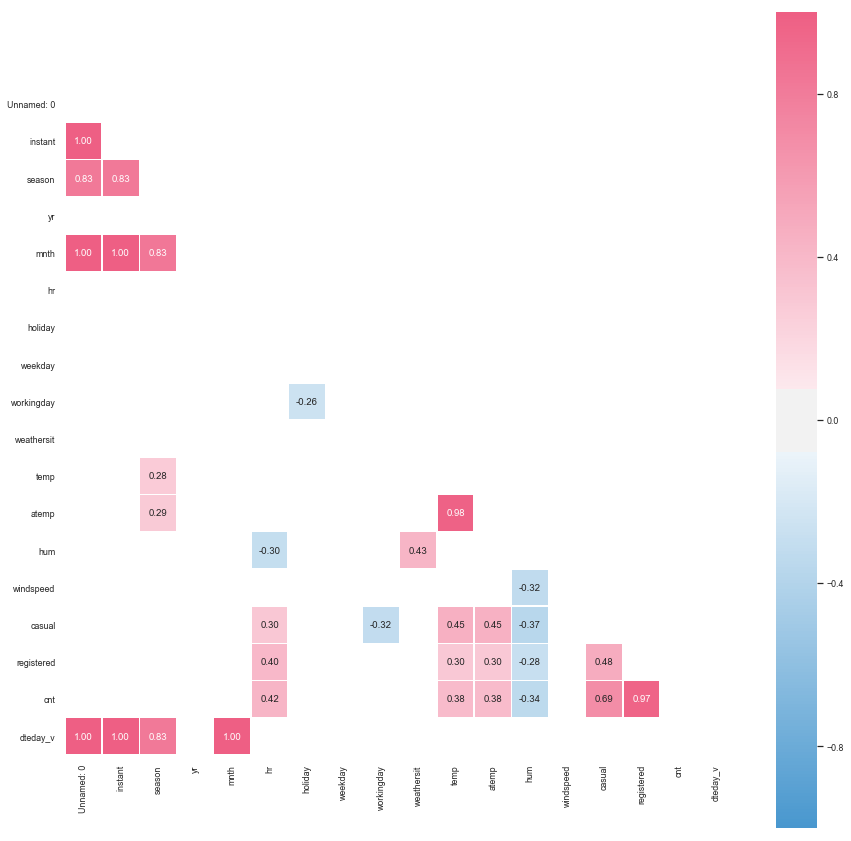

In [39]:
corrThresshold = 0.25 # пороговое значение для коэфф. корреляции 

# цветовая карта
p = sns.diverging_palette(240, # HSV тон положительного
                          0,   # HSV тон отрицательного
                          s=80, # насыщенность.
                          l=60, # яркость
                          sep=20, # ширина центральной "нечувствительной" области
                          n=6,
                          center='light',
                          as_cmap=True)

# построить "маску" для отображения только нижнего треугольника
mask = np.zeros_like(corrNorm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=0.8, style="white")

plt.figure(figsize=(15,15))

# вывод в виде тепловой карты
sns.heatmap(
   data= corrNorm[ ( corrNorm.abs()) > corrThresshold ],  # данные с сравнением абсолютного значения с пороговогым
   cmap=p,  # цветовая карта
   mask=mask,   # применить маску
   square=True, # форма ячейки - квадрат
   annot=True, # вывод значений
   fmt=".2f", # формат вывода значений
   vmin=-1, vmax=1, # граничные значения для цветовой карты 
   linewidths=.5, # расстояние между ячейками
);

In [40]:
dataNumeric[features+target].corr()

,temp,hr,hum,cnt
temp,1.000,0.141,-0.082,0.379
hr,0.141,1.000,-0.298,0.422
hum,-0.082,-0.298,1.000,-0.343
cnt,0.379,0.422,-0.343,1.000


Разделим выборку на обучающую (тренировочную, "train") и отложенную (проверочную, "test") части, методом **train_test_split**. В результате получим 4 объекта x_train, x_test, y_train, y_test.

In [41]:
valid_size = 0.3 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

In [42]:
# Нормированная таблица. Только выбранные признаки
x_train, x_test, y_train, y_test =  train_test_split(
    dataNumeric[features], dataNumeric[target], # исходные данные
    test_size = valid_size, 
    random_state=rand_seed, 
    shuffle=True # перемешивание
) 
print "Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(x_test), 
    len(x_train)+len(x_test), len(y_train)+len(x_test),
)

Кол-во элементов: 
  x_train: 5973, y_train 5973 
  x_test:  2561, y_test  2561 
  total x: 8534, total y 8534 


Сохраним проверочную части исходной таблицы со всеми признаками в отдельный файл.

In [43]:
# Исходная таблица. Все признаки
x_trainALLF, x_testALLF, y_trainALLF, y_testALLF =  train_test_split(
    data.drop(columns=target), data[target], # исходные данные
    test_size = valid_size, 
    random_state=rand_seed, 
    shuffle=True # перемешивание
) 
(pd.concat( [x_testALLF, y_testALLF], axis=1)).to_csv('ds_test.csv', index=False )
x_testALLF[:2]

,Unnamed: 0,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
268,268,269,2011-01-12,1,0,1,15,0,3,1,1,0.20,0.167,0.47,0.418,1,48
6472,6494,6495,2011-10-03,4,0,10,4,0,1,1,1,0.34,0.348,0.87,0.104,2,6


In [44]:
# Нормированная таблица. Все признаки
x_trainALLF_Norm, x_testALLF_Norm, y_trainALLF_Norm, y_testALLF_Norm =  train_test_split(
    dataNumeric.drop(columns=target), dataNumeric[target], # исходные данные
    test_size = valid_size, 
    random_state=rand_seed, 
    shuffle=True # перемешивание
) 
(pd.concat( [x_testALLF_Norm, y_testALLF_Norm], axis=1)).to_csv('dsNorm_test.csv', index=False )
x_testALLF_Norm[:2]

,Unnamed: 0,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,dteday_v
13634,0.574,0.574,0.667,0.0,0.545,0.217,0.0,1.0,0.0,0.0,0.673,0.683,0.750,0.204,0.011,0.014,0.573
17137,0.975,0.975,0.000,0.0,1.000,0.783,0.0,1.0,0.0,0.0,0.245,0.217,0.333,0.574,0.019,0.102,0.975


In [45]:
x_test.head(2)

,temp,hr,hum
13634,0.673,0.217,0.750
17137,0.245,0.783,0.333


In [46]:
y_test.head(2)

,cnt
13634,0.017
17137,0.107


<Figure size 432x288 with 0 Axes>

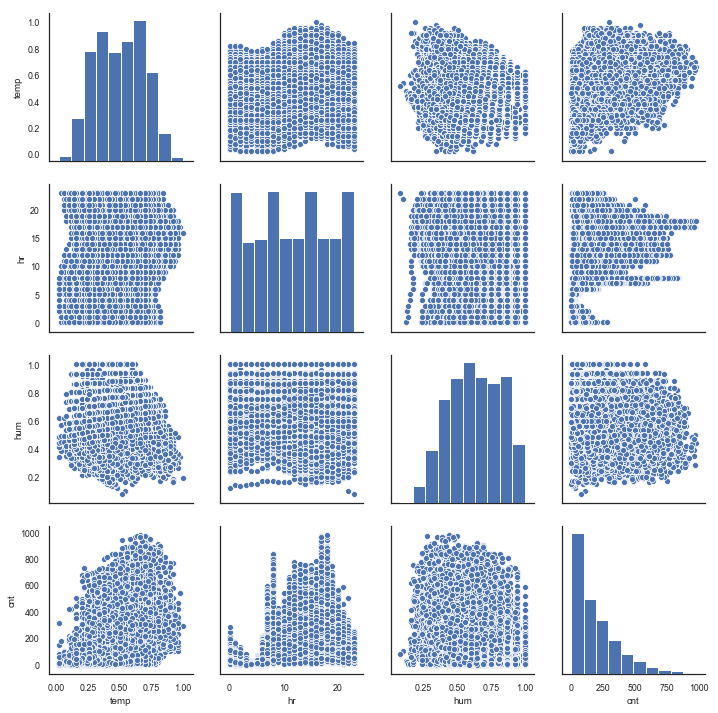

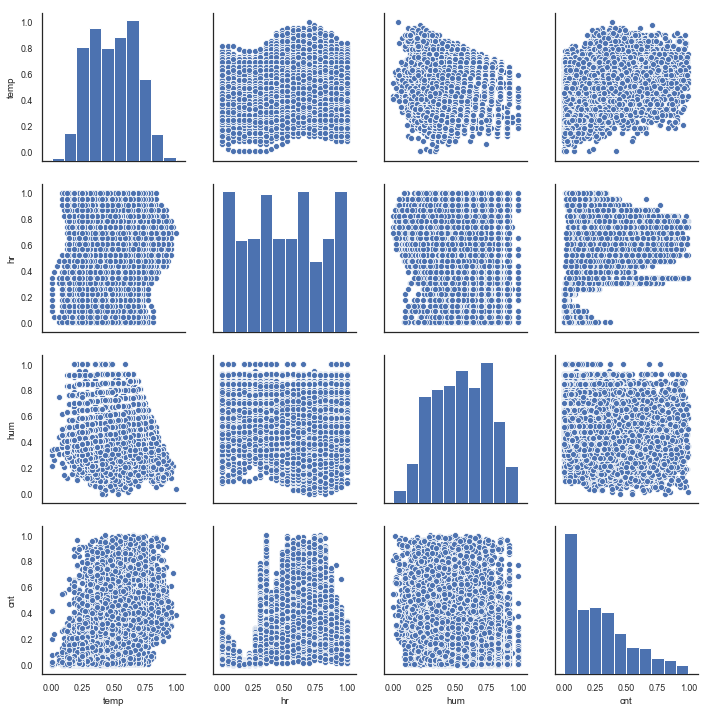

In [47]:
%config InlineBackend.figure_format = 'png' 
plt.figure()
sns.pairplot(data[features+target])
sns.pairplot(dataNumeric[features+target])

# 3. Нейронная сеть

## 3.1. Описание
Для работы с нейронной сетью используем библиотеку PyBrain.
 и модель __многослойный перцептрон (Сети прямого распространения (Feedforward))__

In [403]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.datasets import SupervisedDataSet
from pybrain.structure import SigmoidLayer
from pybrain.structure import LinearLayer
from pybrain.structure import SoftmaxLayer

## 3.2. Модель нейронной сети

### Построение 

Определим количество узлов на каждом слое нейронной сети
- входной слой - 3 узла (по количеству независимых переменных)
- скрытый слой №0 - 9 узлов
- скрытый слой №1 - 6 узлов
- выходной слой - 1 узел (по количеству целевых переменных)

Для создания модели нейронной сети используем конструктор с параметрами __buildNetwork(3, 9, 6, 1)__

In [406]:
net = buildNetwork(3, 9, 6, 1)
net.name="net_3to1_BikeCnt"
current_epoch = 0 # количество проведенных итераций обучения

# просмотр информации о структуре и типе фунции активации каждого слоя
print net

net_3to1_BikeCnt
   Modules:
    [<BiasUnit 'bias'>, <LinearLayer 'in'>, <SigmoidLayer 'hidden0'>, <SigmoidLayer 'hidden1'>, <LinearLayer 'out'>]
   Connections:
    [<FullConnection 'FullConnection-10': 'bias' -> 'hidden1'>, <FullConnection 'FullConnection-5': 'hidden0' -> 'hidden1'>, <FullConnection 'FullConnection-6': 'in' -> 'hidden0'>, <FullConnection 'FullConnection-7': 'hidden1' -> 'out'>, <FullConnection 'FullConnection-8': 'bias' -> 'out'>, <FullConnection 'FullConnection-9': 'bias' -> 'hidden0'>]



### Подготовка обучающего набора данных

При обучения модели с учителем, для хранения обучающего набора данных используется отдельный класс __SupervisedDataSet__. Создадим экземпляр класса используя конструктор 
    __SupervisedDataSet(inp, target)__, где: 
    
      inp - число входных данных
      target - число выхожных данных

In [407]:
# Создать объект для хранения 3 входных и 1 выходного значения
ds = SupervisedDataSet(3, 1)

Для добавления обучающих данных используем методы 
 - __ds.setField('input',  x_train[features])__ - метод для добавления массива значений, где: 
    - 'input' / 'target' - назначение данных ("входные" / "выходные")
    -  x_train[features] - массив значений
 
 - __addSample(inp, target)__ - метод добавления отдельной строки, где:
     - inp - масиив входных значений
     - target - выходное значение

In [408]:
ds.clear()
ds.setField('input',  x_train[features]) # входные
ds.setField('target', y_train[target])   # выходные

In [409]:
if ( (len(x_train) == ds.getLength()) ):
    print "Добавление данных прошло успешно. ", ds.getLength(), "элементов."
else:
    print "Не совпадает кол-во элементов. При добавлении данных возникли проблемы."

Добавление данных прошло успешно.  5973 элементов.


Сверим данные тренировочной части в объекте SupervisedDataSet и источнике

In [410]:
row_num = 10
print "SupervisedDataSet ", ds.getSample(row_num)
print "x_train           ", x_train[features].iloc[row_num].values, y_train[target].iloc[row_num].values

SupervisedDataSet  [array([0.14285714, 0.08695652, 0.36904762]), array([0.05540897])]
x_train            [0.14285714 0.08695652 0.36904762] [0.05540897]


In [411]:
print "SupervisedDataSet "
print ds['input'][:3]

SupervisedDataSet 
[[0.24489796 0.91304348 0.33333333]
 [0.7755102  0.60869565 0.20238095]
 [0.34693878 0.43478261 0.54761905]]


In [412]:
print "x_train           "
print x_train[:3]

x_train           
        temp     hr    hum
9073   0.245  0.913  0.333
12803  0.776  0.609  0.202
16386  0.347  0.435  0.548


In [413]:
print "SupervisedDataSet "
print ds['target'][:3]

SupervisedDataSet 
[[0.15831135]
 [0.80211082]
 [0.22559367]]


In [414]:
print "y_train           "
print y_train[:3]

y_train           
         cnt
9073   0.158
12803  0.802
16386  0.226


### Обучение модели

Для обучения модели используем метод обратного распространения ошибки (англ. backpropagation). В библиотеке PyBrain использована концепция "тренеров" для обучения сетей с учителем. 

Создадим объект "тренер" с помощью конструктора.

__BackpropTrainer(module, dataset=None, learningrate=0.01, lrdecay=1.0, momentum=0.0, verbose=False, batchlearning=False, weightdecay=0.0)__ и укажем в параметрах экземпляр сети (net) и хранилища данных (ds)
- - - - - 
- The _learning rate_ gives the ratio of which parameters are changed into the direction of the gradient. 
- The _learning rate_ decreases by _lrdecay_, which is used to to multiply the learning rate after each training step. 
- The parameters are also adjusted with respect to _momentum_, which is the ratio by which the gradient of the last timestep is used.

- If _batchlearning_ is set, the parameters are updated only at the end of each epoch. Default is False.

- _weightdecay_ corresponds to the weightdecay rate, where 0 is no weight decay at all.

In [415]:
trainerSellHouse = BackpropTrainer(net, dataset=ds)

Для запуска процедуры обучения доступны несколько методов:
- .train() Запускает обучение на одну итерацию (эпоху)
- .trainEpochs(epochs=1, *args, * *kwargs)  запускает обучение на несколько итераций (эпох)

In [416]:
print "Double proportional to the error:  {:>10,.6f}".format(trainerSellHouse.train() ) 
current_epoch += 1


y_pred_OnTrain = list()
# получить выходное значение на основе очередного входного вектора
for inp, tar in ds:
    y_pred_OnTrain.append( [net.activate(inp)[0]])
    
# Проверим точность модели на обучающей выборке
r2           = metrics.r2_score                   (y_train, y_pred_OnTrain)
mae_tree     = metrics.mean_absolute_error        (y_train, y_pred_OnTrain)
mse_LinRegr  = metrics.mean_squared_error         (y_train, y_pred_OnTrain) 
rmse_LinRegr = np.sqrt( mse_LinRegr )
print "MAE  {:>10,.6f} - средняя абсолютная ошибка.".format( mae_tree)
print "MSE  {:>10,.6f} - средреквадратичная ошибка.".format( mse_LinRegr )
print "RMSE {:>10,.6f} - кв. корень из средреквадратичной ошибки.".format( rmse_LinRegr )
print "R2   {:>10,.6f} - коэфф. детерминации.".format( r2 )

print ""

Double proportional to the error:    0.035092
MAE    0.198033 - средняя абсолютная ошибка.
MSE    0.065695 - средреквадратичная ошибка.
RMSE   0.256311 - кв. корень из средреквадратичной ошибки.
R2    -0.036403 - коэфф. детерминации.



Проведем последовательно несколько итераций (эпох) обучения модели c расчетом метрик точности на каждой итерации.

In [417]:
## trainEpochs
R2_OnTrain = list()
R2_OnTest = list()

max_epoch =25
target_epoch = current_epoch+max_epoch

for i in range (current_epoch, target_epoch):
    print "{:>2} / {} epoch".format(i,target_epoch)
    current_epoch = i
    
    #trainerSellHouse.trainEpochs(i)
    trainerSellHouse.train()
    
    y_pred_OnTrain = list()
    for inp, tar in ds:
        y_pred_OnTrain.append( [net.activate(inp)[0]])
      
    y_pred_OnTest = list()
    for inp in x_test.values:
        y_pred_OnTest.append( [net.activate(inp)[0] ] )
        
    r2_net_OnTrain = metrics.r2_score     (y_train, y_pred_OnTrain)
    r2_net_OnTest  = metrics.r2_score     (y_test, y_pred_OnTest)
    
    mae_net  = metrics.mean_absolute_error  (y_train, y_pred_OnTrain)
    mse_net  = metrics.mean_squared_error   (y_train, y_pred_OnTrain) 
    rmse_net = np.sqrt( mse_LinRegr )

    R2_OnTrain.append(r2_net_OnTrain)
    R2_OnTest.append(r2_net_OnTest)
    
    print "MAE      {:>10,.6f} - средняя абсолютная ошибка.".format( mae_net)
    print "MSE      {:>10,.6f} - средреквадратичная ошибка.".format( mse_net )
    print "RMSE     {:>10,.6f} - кв. корень из средреквадратичной ошибки.".format( rmse_net )
    print "R2 Обуч. {:>10,.6f} - коэфф. детерминации.".format( r2_net_OnTrain )
    print "R2 Пров. {:>10,.6f} - коэфф. детерминации.".format( r2_net_OnTest )
    
    print ""

 1 / 26 epoch
MAE        0.196040 - средняя абсолютная ошибка.
MSE        0.056112 - средреквадратичная ошибка.
RMSE       0.256311 - кв. корень из средреквадратичной ошибки.
R2 Обуч.   0.114785 - коэфф. детерминации.
R2 Пров.   0.105283 - коэфф. детерминации.

 2 / 26 epoch
MAE        0.180604 - средняя абсолютная ошибка.
MSE        0.050621 - средреквадратичная ошибка.
RMSE       0.256311 - кв. корень из средреквадратичной ошибки.
R2 Обуч.   0.201399 - коэфф. детерминации.
R2 Пров.   0.197520 - коэфф. детерминации.

 3 / 26 epoch
MAE        0.166865 - средняя абсолютная ошибка.
MSE        0.047285 - средреквадратичная ошибка.
RMSE       0.256311 - кв. корень из средреквадратичной ошибки.
R2 Обуч.   0.254033 - коэфф. детерминации.
R2 Пров.   0.256388 - коэфф. детерминации.

 4 / 26 epoch
MAE        0.161917 - средняя абсолютная ошибка.
MSE        0.045327 - средреквадратичная ошибка.
RMSE       0.256311 - кв. корень из средреквадратичной ошибки.
R2 Обуч.   0.284920 - коэфф. детерминац

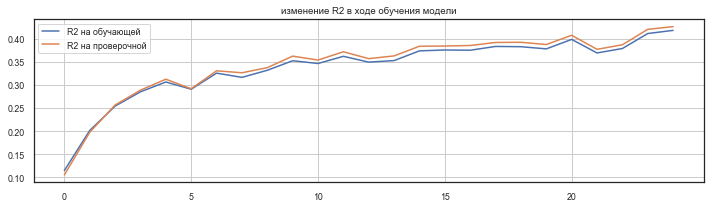

In [418]:
plt.figure(figsize=(12, 3))
ax = plt.subplot()
plt.plot( np.arange(current_epoch - len(R2_OnTrain), current_epoch, step=1) , R2_OnTrain ,  label= u"R2 на обучающей")
plt.plot( np.arange(current_epoch - len(R2_OnTest),  current_epoch, step=1) , R2_OnTest  ,  label= u"R2 на проверочной")
plt.title(u"изменение R2 в ходе обучения модели")
plt.legend()

major_ticks = np.arange(current_epoch - len(R2_OnTrain), current_epoch, 5)

ax.set_xticks(major_ticks)
plt.grid(True)

In [419]:
# Описание структуры модели

for mod in net.modules:
    print("Module:", mod.name)
    if mod.paramdim > 0:
        print("--parameters:", mod.params)
    for conn in net.connections[mod]:
        print("-connection to", conn.outmod.name)
        if conn.paramdim > 0:
             print("- parameters", conn.params)
    if hasattr(net, "recurrentConns"):
        print("Recurrent connections")
        for conn in net.recurrentConns:
            print("-", conn.inmod.name, " to", conn.outmod.name)
            if conn.paramdim > 0:
                print("- parameters", conn.params)

('Module:', 'out')
('Module:', 'hidden0')
('-connection to', 'hidden1')
('- parameters', array([-1.18662132,  0.1065314 , -0.33681259, -0.99339811,  1.75872626,
       -1.51568439,  0.49221291,  1.32853024, -0.51344009, -0.59853811,
        0.26060577, -0.80491053, -0.53478638,  1.01745409, -0.76879734,
       -0.6325732 , -1.71830454,  1.28905725,  2.98596732,  0.71526236,
       -1.69032804, -0.82093626, -1.20286858, -0.55982205,  0.68871762,
        1.23652651,  0.63037218, -0.69893124,  0.21252501, -0.85093773,
        0.52414182,  0.80420339, -0.75658293,  0.28828849, -0.30623791,
       -0.74219203, -1.04296782,  1.83528282,  1.00556956,  0.45168382,
       -0.49733861, -0.13508691, -1.59389296,  0.43293675,  0.88050278,
        0.90073903,  1.97730307,  1.44116616,  0.98181604,  0.74747885,
       -0.46398497, -0.75465225, -1.56697889, -0.46125192]))
('Module:', 'in')
('-connection to', 'hidden0')
('- parameters', array([-0.91513374,  1.86288111,  1.32454881, -0.88796136, -0.109

### Проверка. Обучающая выборка 

In [420]:
y_pred_OnTrain = list()
for inp, tar in ds:
     y_pred_OnTrain.append( [net.activate(inp)[0]])

In [421]:
y_pred_OnTrain[:5]

[[0.31828575241048496],
 [0.5579101476954453],
 [0.29479006063510527],
 [0.14598063679079454],
 [0.26939914086999517]]

In [422]:
print "Нейронная сеть"
r2_net_OnTrain  = metrics.r2_score                   (y_train, y_pred_OnTrain)
mae_net         = metrics.mean_absolute_error        (y_train, y_pred_OnTrain)
mse_net         = metrics.mean_squared_error         (y_train, y_pred_OnTrain) 
rmse_net        = np.sqrt( mse_LinRegr )

print "MAE  {:>10,.6f} - средняя абсолютная ошибка.".format( mae_net)
print "MSE  {:>10,.6f} - средреквадратичная ошибка.".format( mse_net )
print "RMSE {:>10,.6f} - кв. корень из средреквадратичной ошибки.".format( rmse_net )
print "R2   {:>10,.6f} - коэфф. детерминации.".format( r2_net_OnTrain )

Нейронная сеть
MAE    0.150405 - средняя абсолютная ошибка.
MSE    0.036908 - средреквадратичная ошибка.
RMSE   0.256311 - кв. корень из средреквадратичной ошибки.
R2     0.417748 - коэфф. детерминации.


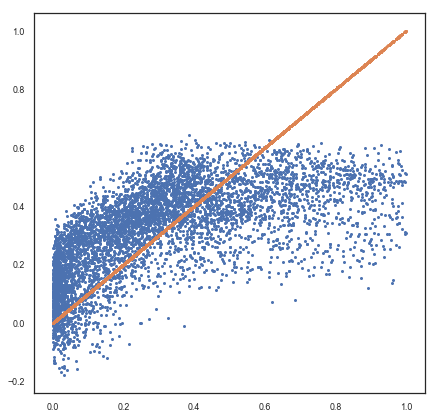

In [423]:
plt.figure(figsize=(7,7))
plt.scatter(y_train, y_pred_OnTrain, s=4)
plt.scatter(y_train, y_train,        s=4)

### Проверка. Отложенная выборка 

In [424]:
y_pred_OnTest = list()
for inp in x_test.values:
    #print inp, net.activate(inp)
    y_pred_OnTest.append( [net.activate(inp)[0] ] )

In [425]:
print len(y_pred_OnTest), len(x_test), len(y_pred_OnTest) == len(x_test) 
y_pred_OnTest[:5]

2561 2561 True


[[0.25135867962464653],
 [0.3259100169159739],
 [0.0558429573505701],
 [0.3884990207671941],
 [0.46677088658741184]]

In [426]:
print "Нейронная сеть"
r2_net_OnTest  = metrics.r2_score            (y_test, y_pred_OnTest)
mae_net         = metrics.mean_absolute_error (y_test, y_pred_OnTest)
mse_net         = metrics.mean_squared_error  (y_test, y_pred_OnTest) 
rmse_net        = np.sqrt( mse_LinRegr )

print "MAE  {:>10,.6f} - средняя абсолютная ошибка.".format( mae_net)
print "MSE  {:>10,.6f} - средреквадратичная ошибка.".format( mse_net )
print "RMSE {:>10,.6f} - кв. корень из средреквадратичной ошибки.".format( rmse_net )
print "R2   {:>10,.6f} - коэфф. детерминации.".format( r2_net_OnTest )

Нейронная сеть
MAE    0.147083 - средняя абсолютная ошибка.
MSE    0.034779 - средреквадратичная ошибка.
RMSE   0.256311 - кв. корень из средреквадратичной ошибки.
R2     0.425844 - коэфф. детерминации.


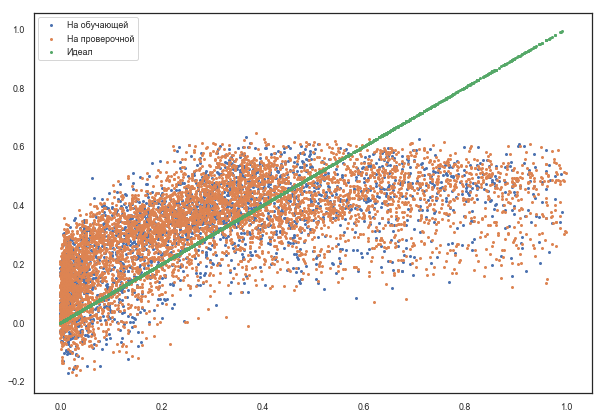

In [427]:
fig=plt.figure(figsize=(10,7))
ax = fig.subplots()

ax.scatter(y_test,  y_pred_OnTest  , s=4, label=u'На обучающей'  )
ax.scatter(y_train, y_pred_OnTrain,  s=4, label=u'На проверочной'  )
ax.scatter(y_test,  y_test,          s=4, label=u'Идеал' )
ax.legend(loc="best")

### Сохранение обученной модели в файл

Модуль Pickle реализует алгоритм сериализации и десериализации объектов Python. Позволяет преобразовывать объекты Python в поток байтов, и обратную операцию преобразования  поток байтов в Python-объект. Применяется для сохранения и загрузки сложных объектов в Python.

In [428]:
# сохраним модель нейнронной сети
import pickle
# имя файла
fileName_net = "model_Net_3to1_BikeCnt.data_pickle"

# операция записи в файл
with open(fileName_net, 'wb') as f:
    pickle.dump(net, f)

## 3.3. Перебор комбинаций структуры сети

Создадим объект нейроную сеть с помощью конструктора 
__buildNetwork ( *layers, **options )__, где:
  - __*layers__ - список или кортеж целых чисел, которые определяют кол-во узлов в каждом слое
 
 
- __**option__:
  - inclass    = ТИП_СЛОЯ
  - hiddenclass= ТИП_СЛОЯ
  - outclass   = ТИП_СЛОЯ
    - ТИП_СЛОЯ = { BiasUnit, GaussianLayer, LinearLayer, LSTMLayer, MDLSTMLayer, SigmoidLayer, SoftmaxLayer, StateDependentLayer, TanhLayer}


Перебор кофигураций с вычислением коэфф.

In [429]:
# границы диапазона кол-ва узлов для каждого скрытого слоя. Для процедуры поиска лучшей модели 
inLayer=3
outLayer=1

hidLayer0_min = 0
hidLayer0_max = 18
hidLayer0_step = 3

hidLayer1_min = 0
hidLayer1_max = 15
hidLayer1_step = 3

hidLayer2_min = 0
hidLayer2_max = 9
hidLayer2_step = 3

In [430]:
# подготовить объект хранилище данных для 
# Создать объект для хнаранения 3 входных и 1 выходного значения
ds88 = SupervisedDataSet(3, 1)

In [431]:
ds88.clear()
ds88.setField('input',  x_train[features])
ds88.setField('target', y_train[target])

In [432]:
if ( (len(x_train) == ds88.getLength()) ):
    print "Добавление данных прошло успешно."
else:
    print "Не совпадает кол-во элементов. При добавлении данных возникли проблемы."

Добавление данных прошло успешно.


In [433]:
# combinatonSet множество комбинаций кол-ва узлов в скрытых слоях нейронной сети
combinatonSet = set()

epoch_count = 4 # ко-во итераций обучения для каждого варианта

result_R2_MAE = dict()

# перебор возможных комбинаций с 
# обучение модели, получение метрики R2
for zero in range(hidLayer0_min, hidLayer0_max, hidLayer0_step):
    for first in range(hidLayer1_min, hidLayer1_max, hidLayer1_step):
        for second in range(hidLayer2_min, hidLayer2_max, hidLayer2_step):
            net88 = None
            netCode_truple = None

            if   ( zero>0 and first>0 and second>0 
                          and not (inLayer, zero,  first,  second, outLayer) in combinatonSet):
                netCode_truple  = (inLayer, zero,  first,  second, outLayer)
                print "in:{}, z:{}, f:{}, s:{}, out:{}".format(inLayer, zero,  first,  second, outLayer)
                combinatonSet.add(  (inLayer, zero,  first,  second, outLayer) )
                net88 = buildNetwork(inLayer, zero,  first,  second, outLayer)
                
            elif ( zero>0 and first>0
                          and not (inLayer, zero, first, outLayer) in combinatonSet):
                netCode_truple  = (inLayer, zero, first, outLayer)
                print "in:{}, z:{}, f:{}, out:{}".format(inLayer, zero,  first, outLayer)
                combinatonSet.add(  (inLayer, zero,  first, outLayer) )
                net88 = buildNetwork(inLayer, zero,  first, outLayer)
                
            elif ( zero>0 and not (inLayer, zero, outLayer) in combinatonSet):
                netCode_truple  = (inLayer, zero, outLayer)
                print "in:{}, z:{}, out:{}".format(inLayer, zero, outLayer)
                combinatonSet.add(  (inLayer, zero, outLayer) )
                net88 = buildNetwork(inLayer, zero, outLayer)
                
            else:
                pass
                #print "all Zerooo"
                
            if (net88 is not None):
                # обучить
                trainerSellHouse88 = BackpropTrainer(net88, ds88)
                ###### print "Квадратична ошибка:  {:>10,.6f}".format(
                trainerSellHouse88.trainEpochs(epochs=7) 
                
                # Вычислить ответ сети на проверочной части
                y_pred_OnTest88 = list()
                for inp in x_test.values:
                    y_pred_OnTest88.append( [net88.activate(inp)[0] ] )
                
                # расчитать метрики точности
                r2_net88   = metrics.r2_score            (y_test, y_pred_OnTest88)
                mae_net88  = metrics.mean_absolute_error (y_test, y_pred_OnTest88)
                mse_net88  = metrics.mean_squared_error  (y_test, y_pred_OnTest88) 
                rmse_net88 = np.sqrt( mse_net88 )
                
                result_R2_MAE[netCode_truple] = (r2_net88,  mae_net88, mse_net88, rmse_net88 )

                print "MAE  {:>10,.6f} - средняя абсолютная ошибка.".format( mae_net88)
                print "MSE  {:>10,.6f} - средреквадратичная ошибка.".format( mse_net88 )
                print "RMSE {:>10,.6f} - кв. корень из средреквадратичной ошибки.".format( rmse_net88 )
                print "R2 Пров.  {:>10,.6f} - коэфф. детерминации.".format( r2_net88 )
                print ""
                
            pass
# - - - - - - - - - - - - - - - - - - - - - - - - - 

in:3, z:3, out:1
MAE    0.164736 - средняя абсолютная ошибка.
MSE    0.041360 - средреквадратичная ошибка.
RMSE   0.203372 - кв. корень из средреквадратичной ошибки.
R2 Пров.    0.317191 - коэфф. детерминации.

in:3, z:3, f:3, out:1
MAE    0.153647 - средняя абсолютная ошибка.
MSE    0.039269 - средреквадратичная ошибка.
RMSE   0.198164 - кв. корень из средреквадратичной ошибки.
R2 Пров.    0.351716 - коэфф. детерминации.

in:3, z:3, f:3, s:3, out:1
MAE    0.181390 - средняя абсолютная ошибка.
MSE    0.051878 - средреквадратичная ошибка.
RMSE   0.227767 - кв. корень из средреквадратичной ошибки.
R2 Пров.    0.143552 - коэфф. детерминации.

in:3, z:3, f:3, s:6, out:1
MAE    0.216429 - средняя абсолютная ошибка.
MSE    0.064871 - средреквадратичная ошибка.
RMSE   0.254699 - кв. корень из средреквадратичной ошибки.
R2 Пров.   -0.070956 - коэфф. детерминации.

in:3, z:3, f:6, out:1
MAE    0.155007 - средняя абсолютная ошибка.
MSE    0.041853 - средреквадратичная ошибка.
RMSE   0.204581 - к

MAE    0.150362 - средняя абсолютная ошибка.
MSE    0.042280 - средреквадратичная ошибка.
RMSE   0.205620 - кв. корень из средреквадратичной ошибки.
R2 Пров.    0.302008 - коэфф. детерминации.

in:3, z:12, out:1
MAE    0.172892 - средняя абсолютная ошибка.
MSE    0.042758 - средреквадратичная ошибка.
RMSE   0.206779 - кв. корень из средреквадратичной ошибки.
R2 Пров.    0.294117 - коэфф. детерминации.

in:3, z:12, f:3, out:1
MAE    0.153298 - средняя абсолютная ошибка.
MSE    0.039898 - средреквадратичная ошибка.
RMSE   0.199744 - кв. корень из средреквадратичной ошибки.
R2 Пров.    0.341333 - коэфф. детерминации.

in:3, z:12, f:3, s:3, out:1
MAE    0.176744 - средняя абсолютная ошибка.
MSE    0.049551 - средреквадратичная ошибка.
RMSE   0.222600 - кв. корень из средреквадратичной ошибки.
R2 Пров.    0.181974 - коэфф. детерминации.

in:3, z:12, f:3, s:6, out:1
MAE    0.150383 - средняя абсолютная ошибка.
MSE    0.039736 - средреквадратичная ошибка.
RMSE   0.199339 - кв. корень из средр

In [434]:
print "Матрицы для хранения значений метрик. Размерность :",
heatR2  = np.zeros( (hidLayer0_max, hidLayer1_max) )
heatMAE = np.zeros( (hidLayer0_max, hidLayer1_max) )
heatMSE = np.zeros( (hidLayer0_max, hidLayer1_max) )
print heatMAE.shape

Матрицы для хранения значений метрик. Размерность : (18L, 15L)


#### Кол-во узлов в слое Hidden2 == 0 

In [436]:
# из словаря с результатами выбрать значения метрик и перенести в промежуточные списки
for key in result_R2_MAE:
    nz = key[1]
    nf = key[2] if (len(key) >= 4) else 0
    ns = key[3] if (len(key) >= 5) else 0
    
    print len(key), key, nz, nf, ns
 
    # выбрать значения метрик для комбинаций: Кол-во узлов в Hidden2 == 0 
    if(ns == 0):
        heatR2  [nz-1][nf-1] = result_R2_MAE[key][0]
        heatMAE [nz-1][nf-1] = result_R2_MAE[key][1]
        heatMSE [nz-1][nf-1] = result_R2_MAE[key][2]

5 (3, 6, 9, 6, 1) 6 9 6
5 (3, 6, 12, 3, 1) 6 12 3
5 (3, 15, 9, 3, 1) 15 9 3
5 (3, 6, 3, 3, 1) 6 3 3
5 (3, 3, 3, 3, 1) 3 3 3
5 (3, 3, 9, 6, 1) 3 9 6
5 (3, 9, 9, 3, 1) 9 9 3
3 (3, 15, 1) 15 0 0
5 (3, 15, 12, 6, 1) 15 12 6
4 (3, 15, 3, 1) 15 3 0
4 (3, 3, 6, 1) 3 6 0
4 (3, 12, 12, 1) 12 12 0
5 (3, 12, 3, 3, 1) 12 3 3
3 (3, 3, 1) 3 0 0
5 (3, 15, 12, 3, 1) 15 12 3
5 (3, 12, 3, 6, 1) 12 3 6
5 (3, 9, 12, 3, 1) 9 12 3
5 (3, 3, 6, 6, 1) 3 6 6
4 (3, 9, 6, 1) 9 6 0
4 (3, 6, 12, 1) 6 12 0
4 (3, 15, 6, 1) 15 6 0
5 (3, 3, 6, 3, 1) 3 6 3
5 (3, 12, 12, 3, 1) 12 12 3
4 (3, 3, 12, 1) 3 12 0
5 (3, 6, 6, 6, 1) 6 6 6
5 (3, 6, 6, 3, 1) 6 6 3
4 (3, 12, 9, 1) 12 9 0
4 (3, 9, 9, 1) 9 9 0
5 (3, 9, 12, 6, 1) 9 12 6
5 (3, 6, 3, 6, 1) 6 3 6
5 (3, 12, 12, 6, 1) 12 12 6
5 (3, 9, 6, 6, 1) 9 6 6
5 (3, 15, 6, 3, 1) 15 6 3
5 (3, 9, 6, 3, 1) 9 6 3
4 (3, 6, 9, 1) 6 9 0
4 (3, 3, 9, 1) 3 9 0
4 (3, 15, 12, 1) 15 12 0
5 (3, 15, 3, 6, 1) 15 3 6
3 (3, 12, 1) 12 0 0
4 (3, 9, 12, 1) 9 12 0
4 (3, 6, 6, 1) 6 6 0
5 (3, 15, 3, 3, 1) 1

Темнее - лучше


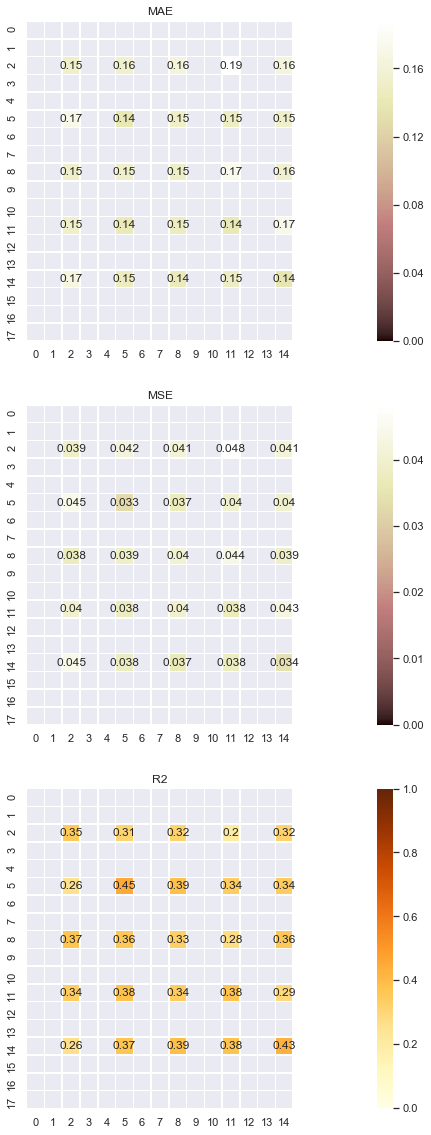

In [437]:
# Построить тепловую катру значений метрик для нейронных сетей. Кол-во узлов в СкрытомСлое№2 == 0 
%config InlineBackend.figure_format = 'png' 
sns.set(font_scale=1) # размер шрифта

plt.figure(figsize=(30,20))


pdMAE = pd.DataFrame(heatMAE)
pdMSE = pd.DataFrame(heatMSE)
pdR2 = pd.DataFrame(heatR2)

ax1 = plt.subplot(3,1,1)
sns.heatmap(  
    data= pdMAE[pdMAE!= 0],
    cmap="pink",
    annot=True, # вывод значений
    square=True,
    linewidths=0.5,
    vmin=0,  vmax=heatMAE.max(), # граничные значения для цветовой карты 
)
plt.title("MAE")

ax2 = plt.subplot(3,1,2)
sns.heatmap(  
    data= pdMSE[pdMSE!= 0],
    cmap="pink",
    annot=True, # вывод значений
    square=True,
    linewidths=0.5,
    vmin=0, vmax=heatMSE.max(), # граничные значения для цветовой карты 
)
plt.title("MSE")

ax3 = plt.subplot(3,1,3)
sns.heatmap(  
    data=  pdR2[pdR2!= 0],
    cmap="YlOrBr",
    annot=True, # вывод значений
    square=True,
    linewidths=0.5,
    vmin=0, vmax=1, # граничные значения для цветовой карты 
)
plt.title("R2")
print "Темнее - лучше"

#### Кол-во узлов в слое Hidden2 == 3

In [439]:
# из словаря с результатами выбрать значения и перенести в промежуточные списки
for key in result_R2_MAE:
    nz = key[1]
    nf = key[2] if (len(key) >= 4) else 0
    ns = key[3] if (len(key) >= 5) else 0
    
    print len(key), key, nz, nf, ns
 
    # выбрать значения метрик для комбинаций: Кол-во узлов в СкрытомСлое№2 == 0 
    if(ns == 3):
        heatR2  [nz-1][nf-1] = result_R2_MAE[key][0]
        heatMAE [nz-1][nf-1] = result_R2_MAE[key][1]
        heatMSE [nz-1][nf-1] = result_R2_MAE[key][2]

5 (3, 6, 9, 6, 1) 6 9 6
5 (3, 6, 12, 3, 1) 6 12 3
5 (3, 15, 9, 3, 1) 15 9 3
5 (3, 6, 3, 3, 1) 6 3 3
5 (3, 3, 3, 3, 1) 3 3 3
5 (3, 3, 9, 6, 1) 3 9 6
5 (3, 9, 9, 3, 1) 9 9 3
3 (3, 15, 1) 15 0 0
5 (3, 15, 12, 6, 1) 15 12 6
4 (3, 15, 3, 1) 15 3 0
4 (3, 3, 6, 1) 3 6 0
4 (3, 12, 12, 1) 12 12 0
5 (3, 12, 3, 3, 1) 12 3 3
3 (3, 3, 1) 3 0 0
5 (3, 15, 12, 3, 1) 15 12 3
5 (3, 12, 3, 6, 1) 12 3 6
5 (3, 9, 12, 3, 1) 9 12 3
5 (3, 3, 6, 6, 1) 3 6 6
4 (3, 9, 6, 1) 9 6 0
4 (3, 6, 12, 1) 6 12 0
4 (3, 15, 6, 1) 15 6 0
5 (3, 3, 6, 3, 1) 3 6 3
5 (3, 12, 12, 3, 1) 12 12 3
4 (3, 3, 12, 1) 3 12 0
5 (3, 6, 6, 6, 1) 6 6 6
5 (3, 6, 6, 3, 1) 6 6 3
4 (3, 12, 9, 1) 12 9 0
4 (3, 9, 9, 1) 9 9 0
5 (3, 9, 12, 6, 1) 9 12 6
5 (3, 6, 3, 6, 1) 6 3 6
5 (3, 12, 12, 6, 1) 12 12 6
5 (3, 9, 6, 6, 1) 9 6 6
5 (3, 15, 6, 3, 1) 15 6 3
5 (3, 9, 6, 3, 1) 9 6 3
4 (3, 6, 9, 1) 6 9 0
4 (3, 3, 9, 1) 3 9 0
4 (3, 15, 12, 1) 15 12 0
5 (3, 15, 3, 6, 1) 15 3 6
3 (3, 12, 1) 12 0 0
4 (3, 9, 12, 1) 9 12 0
4 (3, 6, 6, 1) 6 6 0
5 (3, 15, 3, 3, 1) 1

Темнее - лучше


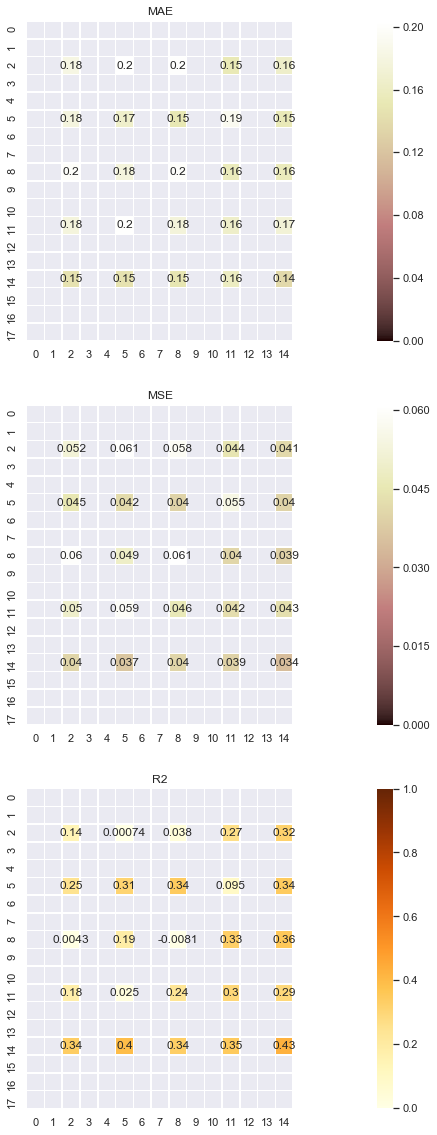

In [440]:
# Построить тепловую катру значений метрик для нейронных сетей. Кол-во узлов в СкрытомСлое№2 == 3 
%config InlineBackend.figure_format = 'png' 
sns.set(font_scale=1) # размер шрифта

plt.figure(figsize=(30,20))


pdMAE = pd.DataFrame(heatMAE)
pdMSE = pd.DataFrame(heatMSE)
pdR2 = pd.DataFrame(heatR2)

ax1 = plt.subplot(3,1,1)
sns.heatmap(  
    data= pdMAE[pdMAE!= 0],
    cmap="pink",
    annot=True, # вывод значений
    square=True,
    linewidths=0.5,
    vmin=0,  vmax=heatMAE.max(), # граничные значения для цветовой карты 
)
plt.title("MAE")

ax2 = plt.subplot(3,1,2)
sns.heatmap(  
    data= pdMSE[pdMSE!= 0],
    cmap="pink",
    annot=True, # вывод значений
    square=True,
    linewidths=0.5,
    vmin=0, vmax=heatMSE.max(), # граничные значения для цветовой карты 
)
plt.title("MSE")

ax3 = plt.subplot(3,1,3)
sns.heatmap(  
    data=  pdR2[pdR2!= 0],
    cmap="YlOrBr",
    annot=True, # вывод значений
    square=True,
    linewidths=0.5,
    vmin=0, vmax=1, # граничные значения для цветовой карты 
)
plt.title("R2")
print "Темнее - лучше"

#### Отдельно коэффициент детерминации R2

0
3
6


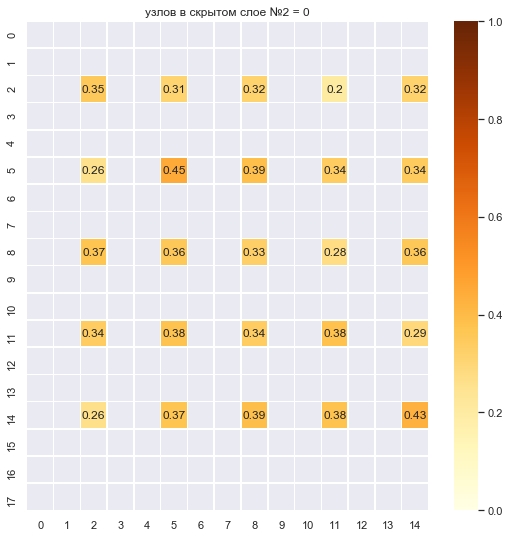

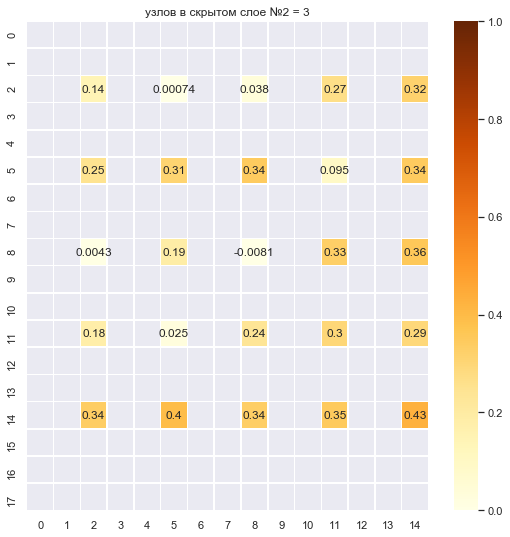

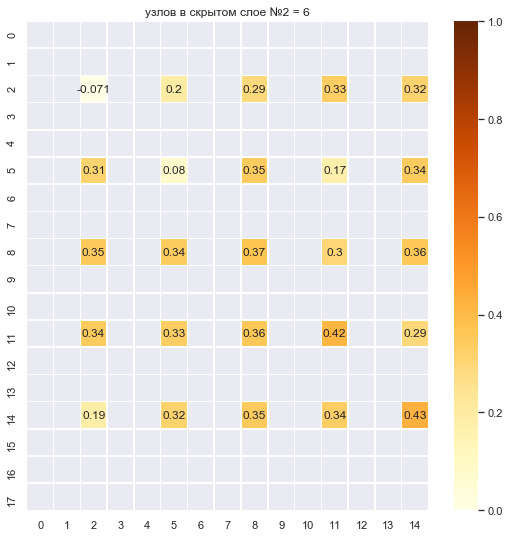

In [442]:
for secondCOunt in range(0, hidLayer2_max, hidLayer2_step):
    print secondCOunt
    
    # из словаря с результатами выбрать значения и перенести в промежуточные списки
    for key in result_R2_MAE:
        nz = key[1]
        nf = key[2] if (len(key) >= 4) else 0
        ns = key[3] if (len(key) >= 5) else 0

        # выбрать значения метрик для комбинаций: Кол-во узлов в СкрытомСлое№2 == 0 
        if(ns == secondCOunt):
            # print len(key), key, nz, nf, ns
            heatR2  [nz-1][nf-1] = result_R2_MAE[key][0]
            heatMAE [nz-1][nf-1] = result_R2_MAE[key][1]
            heatMSE [nz-1][nf-1] = result_R2_MAE[key][2]
            
    plt.figure(figsize=(9,9))
    pdR2 = pd.DataFrame(heatR2)
    sns.heatmap(  
        data=  pdR2[pdR2 != 0],
        cmap="YlOrBr",
        annot=True, # вывод значений
        #square=True,
        linewidths=0.5,
        vmin=0, vmax=1, # граничные значения для цветовой карты 
    )
    plt.title(u"узлов в скрытом слое №2 = "+ str(secondCOunt))
    pass

## 3.4. Сеть. Все числовые параметры

### Формирование тестовой и обучающей выборки. Все чсловые столбцы

In [443]:
valid_size = 0.3 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

x_trainAll, x_testAll, y_trainAll, y_testAll =  train_test_split(
    dataNumeric.drop(columns=target), dataNumeric[target], # исходные данные
    test_size = valid_size, 
    random_state=rand_seed, 
    shuffle=True # перемешивание
) 
print "Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(x_test), 
    len(x_train)+len(x_test), len(y_train)+len(x_test),
)

Кол-во элементов: 
  x_train: 5973, y_train 5973 
  x_test:  2561, y_test  2561 
  total x: 8534, total y 8534 


### Построение 

In [445]:
netAll = None

firstLayerCount = len(x_trainALLF_Norm.columns)
print "Кол-во входных признаков", len(x_trainALLF_Norm.columns)
print x_trainALLF_Norm.columns

netAll = buildNetwork(firstLayerCount, firstLayerCount*2, 6, 1)

Кол-во входных признаков 17
Index([u'Unnamed: 0', u'instant', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'dteday_v'],
      dtype='object')


In [446]:
print netAll

FeedForwardNetwork-908
   Modules:
    [<BiasUnit 'bias'>, <LinearLayer 'in'>, <SigmoidLayer 'hidden0'>, <SigmoidLayer 'hidden1'>, <LinearLayer 'out'>]
   Connections:
    [<FullConnection 'FullConnection-902': 'in' -> 'hidden0'>, <FullConnection 'FullConnection-903': 'bias' -> 'out'>, <FullConnection 'FullConnection-904': 'bias' -> 'hidden0'>, <FullConnection 'FullConnection-905': 'bias' -> 'hidden1'>, <FullConnection 'FullConnection-906': 'hidden1' -> 'out'>, <FullConnection 'FullConnection-907': 'hidden0' -> 'hidden1'>]



### Настройка данных

Для хранения данных, используемых при обучения модели с учителем используем конструктор
__SupervisedDataSet(inp, target)__, где: 
- inp - число входных данных
- target - число выхожных данных

In [448]:
# Создать объект для хнранения 13 входных и 1 выходного значения
dsAll = SupervisedDataSet(firstLayerCount, 1)

Для добавления данных используем метод 
 - __addSample(inp, target)__ Add a new sample consisting of input and target.
 - __ds.setField('input',  x_train[features])__

In [449]:
len(x_trainALLF_Norm.columns)

17

In [450]:
dsAll.clear()
dsAll.setField('input',  x_trainALLF_Norm)
dsAll.setField('target', y_trainALLF_Norm[target])

In [451]:
if ( (len(x_trainALLF_Norm) == dsAll.getLength()) ):
    print "Добавление данных прошло успешно.", len(x_trainALLF_Norm)
else:
    print "Не совпадает кол-во элементов. При добавлении данных возникли проблемы.", len(x_trainALLF_Norm), dsAll.getLength()

Добавление данных прошло успешно. 5973


Сверим данные тренировочной части в объекте SupervisedDataSet и источнике

In [452]:
print "SupervisedDataSet \n", dsAll.getSample(10)
print "x_train           \n", x_trainALLF_Norm.iloc[10].values, y_trainALLF_Norm[target].iloc[10].values

SupervisedDataSet 
[array([0.03847475, 0.03847475, 0.        , 0.        , 0.        ,
       0.08695652, 0.        , 0.        , 0.        , 0.33333333,
       0.14285714, 0.13333333, 0.36904762, 0.35186104, 0.01362398,
       0.05156038, 0.03835616]), array([0.05540897])]
x_train           
[0.03847475 0.03847475 0.         0.         0.         0.08695652
 0.         0.         0.         0.33333333 0.14285714 0.13333333
 0.36904762 0.35186104 0.01362398 0.05156038 0.03835616] [0.05540897]


In [453]:
print "SupervisedDataSet "
print dsAll['input'][:3]

SupervisedDataSet 
[[0.05152868 0.05152868 0.         0.         0.         0.91304348
  0.         0.66666667 1.         0.         0.24489796 0.23333333
  0.33333333 0.44441687 0.01089918 0.1587517  0.04931507]
 [0.47864422 0.47864422 0.66666667 0.         0.45454545 0.60869565
  0.         1.         0.         0.         0.7755102  0.73333333
  0.20238095 0.31476427 0.64850136 0.50339213 0.47671233]
 [0.88892706 0.88892706 1.         0.         0.90909091 0.43478261
  0.         0.5        1.         0.         0.34693878 0.4
  0.54761905 0.         0.0599455  0.20352782 0.89041096]]


In [454]:
print "x_train           "
print x_trainALLF_Norm[:3]

x_train           
       Unnamed: 0  instant  season   yr   mnth     hr  holiday  weekday  \
9073        0.052    0.052   0.000  0.0  0.000  0.913      0.0    0.667   
12803       0.479    0.479   0.667  0.0  0.455  0.609      0.0    1.000   
16386       0.889    0.889   1.000  0.0  0.909  0.435      0.0    0.500   

       workingday  weathersit   temp  atemp    hum  windspeed  casual  \
9073          1.0         0.0  0.245  0.233  0.333      0.444   0.011   
12803         0.0         0.0  0.776  0.733  0.202      0.315   0.649   
16386         1.0         0.0  0.347  0.400  0.548      0.000   0.060   

       registered  dteday_v  
9073        0.159     0.049  
12803       0.503     0.477  
16386       0.204     0.890  


In [455]:
print "SupervisedDataSet "
print dsAll['target'][:3]

SupervisedDataSet 
[[0.15831135]
 [0.80211082]
 [0.22559367]]


In [456]:
print "y_train           "
print y_trainALLF_Norm[:3]

y_train           
         cnt
9073   0.158
12803  0.802
16386  0.226


### Обучение нейросети

In [457]:
trainerSellHouseAll = BackpropTrainer(netAll, dsAll)

Для запуска процедуры обучения доступны несколько методов:
- .train() Запускает обучение на одну итерацию (эпоху)
- .trainEpochs(epochs=1, *args, * *kwargs)  запускает обучение на несколько итераций (эпох)

In [458]:
print "Обучение ...", 
trainerSellHouseAll.trainEpochs(4)
print " проведено"

Обучение ...  проведено


### Проверка. Обучающая выборка 

In [459]:
y_pred_OnTrainAll = list()
for inp, tar in dsAll:
     y_pred_OnTrainAll.append( [netAll.activate(inp)[0]])

In [461]:
y_pred_OnTrainAll[:3]

[[0.08349682656554813], [0.697955952327698], [0.16943840386800801]]

In [462]:
print "Нейронная сеть"
r2_net   = metrics.r2_score                   (y_trainALLF_Norm, y_pred_OnTrainAll)
mae_net  = metrics.mean_absolute_error        (y_trainALLF_Norm, y_pred_OnTrainAll)
mse_net  = metrics.mean_squared_error         (y_trainALLF_Norm, y_pred_OnTrainAll) 
rmse_net = np.sqrt( mse_net )


print "MAE  {:>10,.6f} - средняя абсолютная ошибка.".format( mae_net)
print "MSE  {:>10,.6f} - средреквадратичная ошибка.".format( mse_net )
print "RMSE {:>10,.6f} - кв. корень из средреквадратичной ошибки.".format( rmse_net )
print "R2   {:>10,.6f} - коэфф. детерминации.".format( r2_net )

Нейронная сеть
MAE    0.056342 - средняя абсолютная ошибка.
MSE    0.005371 - средреквадратичная ошибка.
RMSE   0.073287 - кв. корень из средреквадратичной ошибки.
R2     0.915267 - коэфф. детерминации.


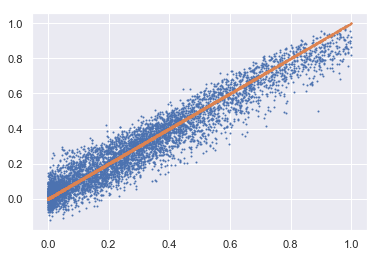

In [463]:
plt.scatter(y_trainALLF_Norm, y_pred_OnTrainAll, s=1)
plt.scatter(y_trainALLF_Norm, y_trainALLF_Norm,        s=1)

### Проверка. Отложенная выборка 

In [464]:
y_pred_OnTestAll = list()
for inp in x_testALLF_Norm.values:
    #print inp, net.activate(inp)
    y_pred_OnTestAll.append( [netAll.activate(inp)[0] ] )

In [465]:
print len(y_pred_OnTestAll), len(x_testALLF_Norm), len(y_pred_OnTestAll) == len(x_testALLF_Norm) 
y_pred_OnTestAll[:5]

2561 2561 True


[[0.09811498004320718],
 [0.27490598939357536],
 [0.08526479341337889],
 [0.27089927055979646],
 [0.616679976513946]]

In [466]:
print "Нейронная сеть"
r2           = metrics.r2_score                   (y_testALLF_Norm, y_pred_OnTestAll)
mae_tree     = metrics.mean_absolute_error        (y_testALLF_Norm, y_pred_OnTestAll)
mse_LinRegr  = metrics.mean_squared_error         (y_testALLF_Norm, y_pred_OnTestAll) 
rmse_LinRegr = np.sqrt( mse_LinRegr )


print "MAE  {:>10,.6f} - средняя абсолютная ошибка.".format( mae_tree)
print "MSE  {:>10,.6f} - средреквадратичная ошибка.".format( mse_LinRegr )
print "RMSE {:>10,.6f} - кв. корень из средреквадратичной ошибки.".format( rmse_LinRegr )
print "R2   {:>10,.6f} - коэфф. детерминации.".format( r2 )

Нейронная сеть
MAE    0.055499 - средняя абсолютная ошибка.
MSE    0.005290 - средреквадратичная ошибка.
RMSE   0.072734 - кв. корень из средреквадратичной ошибки.
R2     0.912663 - коэфф. детерминации.


Text(0,0.5,u'\u041a\u0432\u0430\u0434\u0440\u0430\u0442 \u0437\u043d\u0430\u0447\u0435\u043d\u0438\u044f \u043e\u0448\u0438\u0431\u043a\u0438 \u043c\u043e\u0434\u0435\u043b\u0438 Y')

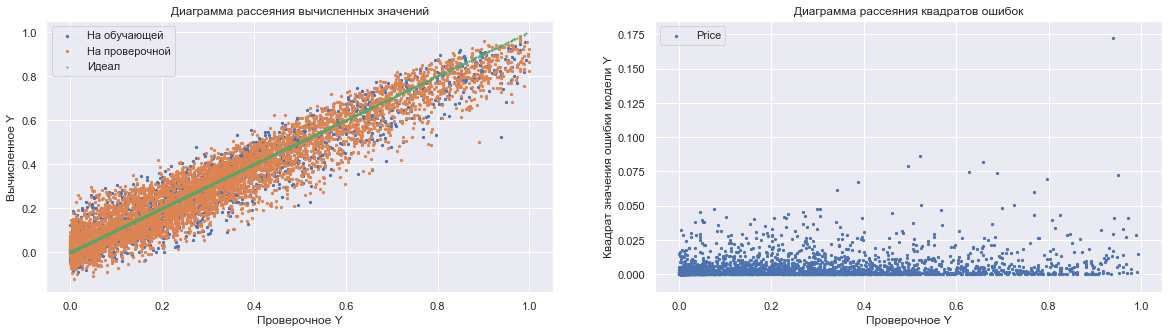

In [472]:
# Графики на одном полотне
plt.figure(figsize=(20,5))
dot_size = 5

# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_testALLF_Norm,  y_pred_OnTestAll  , s=dot_size, label=u'На обучающей'  )
plt.scatter(y_trainALLF_Norm, y_pred_OnTrainAll,  s=dot_size, label=u'На проверочной'  )
plt.scatter(y_testALLF_Norm,  y_testALLF_Norm,          s=1, label=u'Идеал' )
plt.legend(loc="best")

plt.title(u'Диаграмма рассеяния вычисленных значений');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Вычисленное Y')

# создать второе полотно 122: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_testALLF_Norm.values,  pow(abs(y_testALLF_Norm.values - y_pred_OnTestAll),2) , label="Price" , s=dot_size,)
plt.legend(loc="best")
plt.title(u'Диаграмма рассеяния квадратов ошибок');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Квадрат значения ошибки модели Y')

### Сохранение модели (Pickle)

In [473]:
# сохраним модель нейнронной сети
import pickle
# имя файла
fileName_net28 = "model_Net_17to1.data_pickle"

# операция записи в файл
with open(fileName_net28, 'wb') as f:
    pickle.dump(netAll, f)
print "Модель {} сохнанена в файл \"{}\"".format(netAll.__class__, fileName_net28) 

Модель <class 'pybrain.structure.networks.feedforward.FeedForwardNetwork'> сохнанена в файл "model_Net_17to1.data_pickle"


# 4. Линейная множественная регрессия

In [474]:
# создать модель
model_LinRegrMult = linear_model.LinearRegression()

# обучить модель на тренировочной части выборки
model_LinRegrMult.fit(x_train, y_train)

# получить вычисленное значения на проверочной части выборки
y_pred_LinRegrMult = model_LinRegrMult.predict(x_test)

In [475]:
print "Множественная линейная регрессия. Полный диапазон."
print "y_pred_lin_reg_mult (x1, x2, x3) =\n   {:,.3f}*{:} + {:,.3f}*{:} + {:,.3f}*{:} + {:,.3f}\n".format(
    model_LinRegrMult.coef_[0][0], features[0],
    model_LinRegrMult.coef_[0][1], features[1],
    model_LinRegrMult.coef_[0][2], features[2],
    model_LinRegrMult.intercept_[0])

mae_LinRegrMult = metrics.mean_absolute_error(y_test, y_pred_LinRegrMult)
r2_LinRegrMult  = metrics.r2_score           (y_test, y_pred_LinRegrMult)

print "MAE - Cредняя абсолютная ошибка: {:>7,.2f}".format( mae_LinRegrMult )
print "R2 - коэфф. детерминации:        {:>7,.3f}".format( r2_LinRegrMult )

Множественная линейная регрессия. Полный диапазон.
y_pred_lin_reg_mult (x1, x2, x3) =
   0.415*temp + 0.259*hr + -0.259*hum + 0.098

MAE - Cредняя абсолютная ошибка:    0.15
R2 - коэфф. детерминации:          0.335


Text(0.5,0,u'\u0417\u043d\u0430\u0447\u0435\u043d\u0438\u0435')

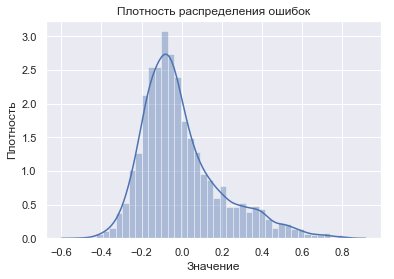

In [477]:
plt.figure(figsize=(6,4))
sns.distplot((y_test - y_pred_LinRegrMult))
plt.title(u'Плотность распределения ошибок');
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение')

Text(0,0.5,u'\u041a\u0432\u0430\u0434\u0440\u0430\u0442 \u0437\u043d\u0430\u0447\u0435\u043d\u0438\u044f \u043e\u0448\u0438\u0431\u043a\u0438 \u043c\u043e\u0434\u0435\u043b\u0438 Y')

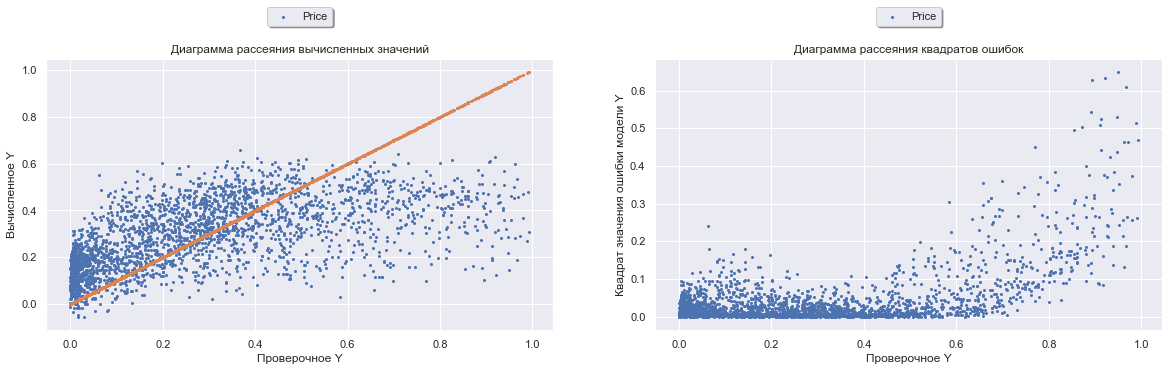

In [478]:
# Графики на одном полотне
plt.figure(figsize=(20,5))
dot_size=4

# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test, y_pred_LinRegrMult, label="Price", s=dot_size)
plt.scatter(y_test, y_test, s=dot_size)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.1),  ncol=1, fancybox=True, shadow=True)
plt.title(u'Диаграмма рассеяния вычисленных значений');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Вычисленное Y')

# создать второе полотно 122: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_test,  pow(abs(y_test - y_pred_LinRegrMult),2) , label="Price" , s=dot_size)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.1),  ncol=1, fancybox=True, shadow=True)
plt.title(u'Диаграмма рассеяния квадратов ошибок');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Квадрат значения ошибки модели Y')

## Получение значения коэфф.

Для последующей загрузки выведем значения коэфф. линейной модели

In [479]:
print "# Просмотр коэфф. обученной модели"
print model_LinRegrMult.coef_
print model_LinRegrMult.intercept_
print model_LinRegrMult.get_params()

# Просмотр коэфф. обученной модели
[[ 0.41541741  0.25870382 -0.25880227]]
[0.09829713]
{'copy_X': True, 'normalize': False, 'n_jobs': None, 'fit_intercept': True}


## Сохранение модели (Pickle)

In [480]:
import pickle
fileName_LinRegrMult = "model_LinRegrMult.data_pickle"

with open(fileName_LinRegrMult, 'wb') as f:
    pickle.dump(model_LinRegrMult, f)
print "Модель {} сохнанена в файл \"{}\"".format(model_LinRegrMult.__class__, fileName_LinRegrMult) 

Модель <class 'sklearn.linear_model.base.LinearRegression'> сохнанена в файл "model_LinRegrMult.data_pickle"


# 5. Дерево регрессии

Найдем оптимальную глубину дерева. Для этого последовательно рассчитаем метрики для моделей деревьев регрессии с различной глубиной. Сравнение проведем по метрике R2 (коэфф. детерминации) 

Глубина дерева=1, R2_кросс.вал. 0.386, R2 на проверочной части = 0.390
Глубина дерева=2, R2_кросс.вал. 0.471, R2 на проверочной части = 0.474
Глубина дерева=3, R2_кросс.вал. 0.554, R2 на проверочной части = 0.568
Глубина дерева=4, R2_кросс.вал. 0.596, R2 на проверочной части = 0.605
Глубина дерева=5, R2_кросс.вал. 0.621, R2 на проверочной части = 0.638
Глубина дерева=6, R2_кросс.вал. 0.658, R2 на проверочной части = 0.659
Глубина дерева=7, R2_кросс.вал. 0.666, R2 на проверочной части = 0.671
Глубина дерева=8, R2_кросс.вал. 0.661, R2 на проверочной части = 0.674
Глубина дерева=9, R2_кросс.вал. 0.65, R2 на проверочной части = 0.679
Глубина дерева=10, R2_кросс.вал. 0.631, R2 на проверочной части = 0.662
Глубина дерева=11, R2_кросс.вал. 0.607, R2 на проверочной части = 0.637
Глубина дерева=12, R2_кросс.вал. 0.58, R2 на проверочной части = 0.616
Глубина дерева=13, R2_кросс.вал. 0.554, R2 на проверочной части = 0.584
Глубина дерева=14, R2_кросс.вал. 0.531, R2 на проверочной части = 0.550

Ма

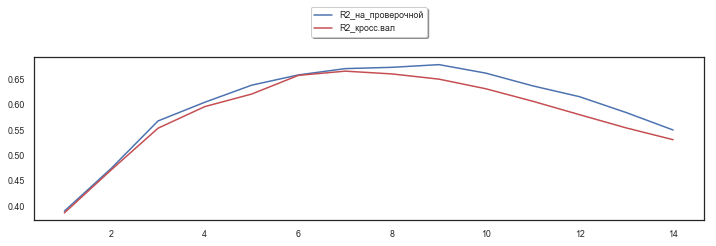

In [48]:
max_depth = 15
tree_seed=1
listR2_Cross = []
listR2_Test = []

for i in range (1,max_depth):
    # создать модель дерева регрессии с очередным значением глубины
    dtRegr = tree.DecisionTreeRegressor(max_depth=i, random_state=tree_seed )
    
    # обучить модель дерева регрессии на тренировочной части выборки
    dtRegr.fit(x_train, y_train)
    
    # получить вычисленние модели на проверочной части выборки
    y_dtRegr = dtRegr.predict(x_test)
    
    # получить оценку R2 на тренировочной подвыборке, разделенной на cv= 5 частей
    scores_cross = cross_val_score(dtRegr, x_train, y_train, cv=5, scoring='r2')
    
    # получить оценку R2 на проверочной подвыборке
    scores_test =  metrics.r2_score(y_test, y_dtRegr)
    
    # сохранение результата
    listR2_Cross.append( scores_cross.mean() )
    listR2_Test.append( scores_test.mean() )
    
   
    ## print ""
    print "Глубина дерева={}, R2_кросс.вал. {:.3}, R2 на проверочной части = {:.3f}".format(
        dtRegr.max_depth, 
        listR2_Cross[i-1],
        listR2_Test[i-1]
    )
    ### print scores_cross
print ""   
print "Максимальный R2= R2_кросс.вал. {:.3}, R2 на проверочной части = {:.3f}".format(
        max(listR2_Cross),
        max(listR2_Test)
    )

plt.figure(figsize=(12, 3))
plt.plot( np.arange(1, max_depth, step=1) , listR2_Test ,  label= u"R2_на_проверочной", c="b")
plt.plot( np.arange(1, max_depth, step=1) , listR2_Cross,  label= u"R2_кросс.вал", c="r")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.1),  ncol=1, fancybox=True, shadow=True)

Значение оптимальной глубины дерева регрессии принимаем равной 7. Приступим к оценке полученной модели.

In [49]:
opt_depth= 7
treeRegr_d7 = tree.DecisionTreeRegressor(max_depth=opt_depth)
treeRegr_d7.fit(x_train, y_train)

# Получить вычислнные значения на проверочном наборе
y_treeRegr_d7 = treeRegr_d7.predict(x_test)

In [51]:
print "Дерево решений. Регрессия. Усеченный диапазон."
mae_tree = metrics.mean_absolute_error(y_test, y_treeRegr_d7)
r2_tree  = metrics.r2_score           (y_test, y_treeRegr_d7)

print "MAE - средняя абсолютная ошибка: {:>7,.0f} дерево регр. ".format( mae_tree)
print "R2  - коэфф. детерминации:       {:>7,.3f} дерево регр. ".format( r2_tree )

Дерево решений. Регрессия. Усеченный диапазон.
MAE - средняя абсолютная ошибка:       0 дерево регр. 
R2  - коэфф. детерминации:         0.671 дерево регр. 


Text(0.5,0,u'\u0417\u043d\u0430\u0447\u0435\u043d\u0438\u0435')

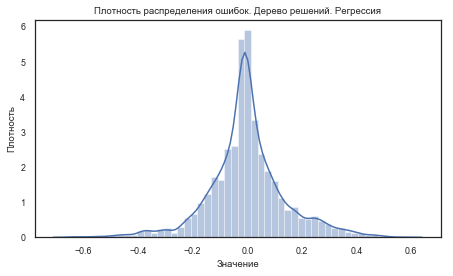

In [52]:
plt.figure(figsize=(16,4))

plt.subplot(121)
sns.distplot((y_test - y_treeRegr_d7.reshape(-1,1)))

plt.title(u'Плотность распределения ошибок. Дерево решений. Регрессия');
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение')

Text(0,0.5,u'\u043a\u0432\u0430\u0434\u0440\u0430\u0442 \u0437\u043d\u0430\u0447\u0435\u043d\u0438\u044f \u043e\u0448\u0438\u0431\u043a\u0438 \u043c\u043e\u0434\u0435\u043b\u0438 Y')

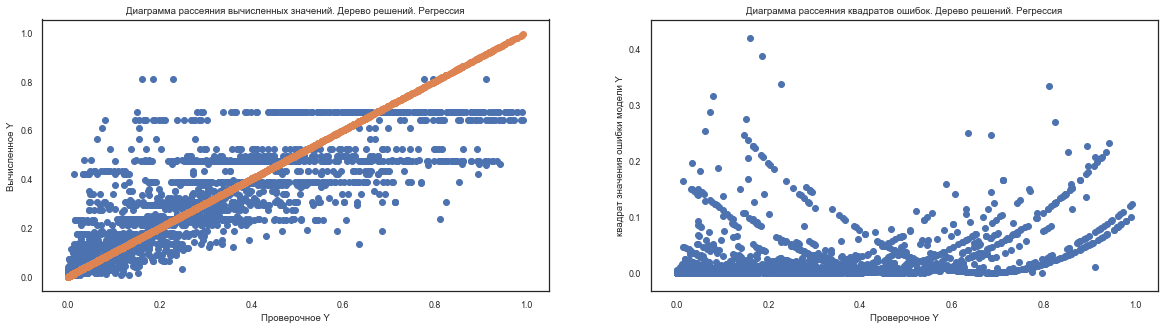

In [53]:
# Графики на одном полотне

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.scatter(y_test, y_treeRegr_d7)
plt.scatter(y_test, y_test)
plt.title(u'Диаграмма рассеяния вычисленных значений. Дерево решений. Регрессия');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Вычисленное Y')

plt.subplot(122)
plt.scatter(y_test,  pow(abs(y_test - y_treeRegr_d7.reshape(-1,1)),2) )
plt.title(u'Диаграмма рассеяния квадратов ошибок. Дерево решений. Регрессия');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'квадрат значения ошибки модели Y')

In [54]:
# сохранение структуры дерева в промежуточном формате *.dot
export_graphviz(treeRegr_d7, out_file='treeRegr_d7.dot')

In [55]:
# создание графического изображения структуры дерева решений при помощи ПО "Graphviz"
# путь(абсолютный или относительный) к внешнему исполняемому файлу \graphviz-2.38\release\bin\dot.exe
!"C:\Users\User\Intelligent_system\rgr\release\bin\dot.exe" -Tpng treeRegr_d7.dot -o treeRegr_d7.png

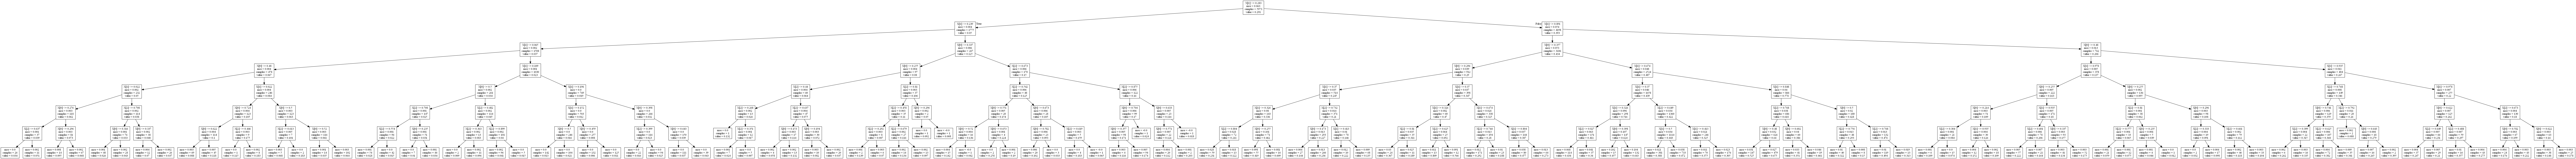

In [56]:
# показать изображение
from IPython.display import Image
Image(filename='treeRegr_d7.png')

## Сохранение модели (Pickle)

In [57]:
import pickle
fileName_treeRegr_d7 = "model_treeRegr_d7.data_pickle"

with open(fileName_treeRegr_d7, 'wb') as f:
    pickle.dump(treeRegr_d7, f)
print "Модель {} сохнанена в файл \"{}\"".format(treeRegr_d7.__class__, fileName_treeRegr_d7) 

Модель <class 'sklearn.tree.tree.DecisionTreeRegressor'> сохнанена в файл "model_treeRegr_d7.data_pickle"
